# Decision Trees

on the penguin dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### Preparations

In [10]:
df = pd.read_csv('penguins_simple.csv', sep = ';')
df.dropna(inplace=True)

#### 1. Inspect the size of the dataset

In [11]:
df.shape

(333, 6)

#### 2. Select the Species column to use as target

In [12]:
y = df['Species']

#### 3. Select two columns to use as input features

In [14]:
X = df[['Culmen Length (mm)', 'Culmen Depth (mm)']]

In [15]:
X.head()

,Culmen Length (mm),Culmen Depth (mm)
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,36.7,19.3
4,39.3,20.6


#### 4. Plot the data

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[k

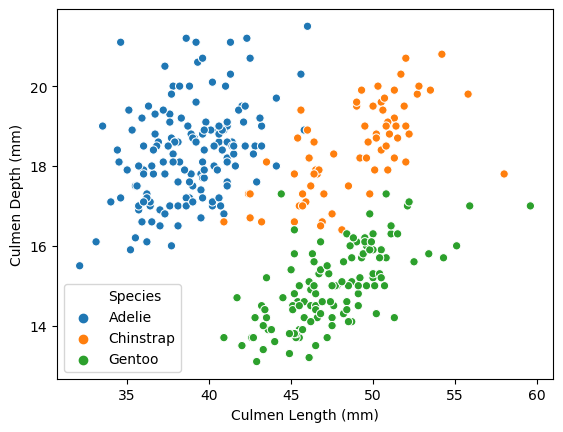

In [23]:
sns.reset_orig()
sns.scatterplot(x=X['Culmen Length (mm)'], y=X['Culmen Depth (mm)'], hue=df['Species'])
plt.figsize = (12,8)

## Decision Tree from Scratch

#### 5. Make one prediction for every penguin

In [25]:
predictions = []
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row[0] < 42:
        predictions.append('Adelie')
    else:
        if row[1]<17:
            predictions.append('Gentoo')
        else:
            predictions.append('Chinstrap')
            
    
        

In [27]:
print(predictions)
print(len(predictions))

['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adeli

#### 6. Calculate the accuracy of the model

In [32]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y, predictions), 2)

0.9

## Find the optimal separation with Scikit

#### 7. Train the model

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree #DecisionTreeRegressor

In [36]:
m = DecisionTreeClassifier(max_depth=2)  # we allow that many questions
m.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 8. Make predictions

In [38]:
ypred = m.predict(X)

#### 9. Calculate the accuracy

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print(accuracy_score(y, ypred))

0.933933933933934


## Plot the tree

In [41]:
X.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)'], dtype='object')

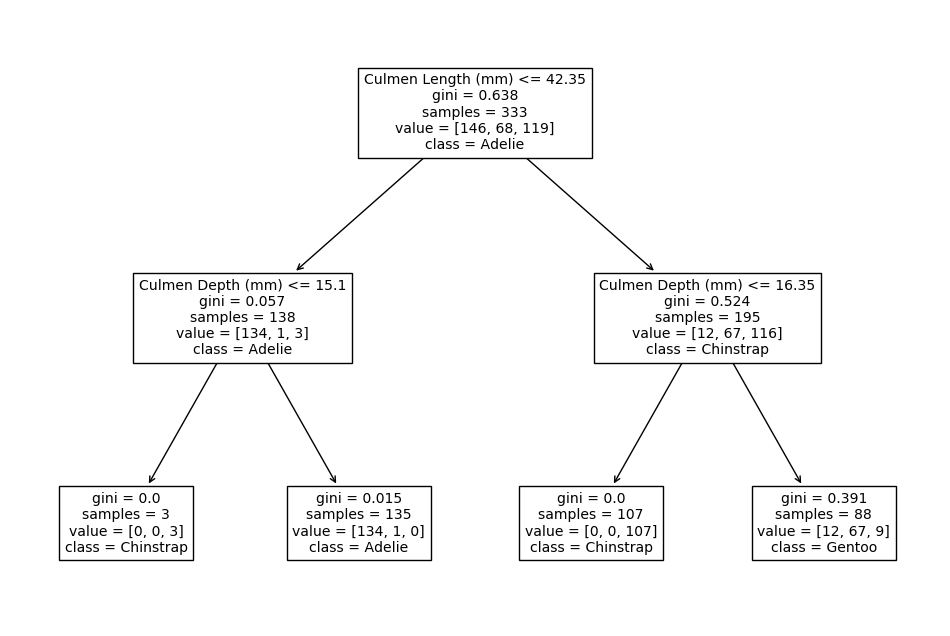

In [42]:
plt.figure(figsize=(12,8))
t =plot_tree(m, feature_names = X.columns, class_names = ['Adelie', 'Gentoo', 'Chinstrap'])

#### 10. Plot the tree with according labels